In [9]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [18]:
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'

In [19]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [20]:
resnet.summary()


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [21]:
for layer in resnet.layers:
    layer.trainable = False

In [22]:
folders = glob('Dataset/Train/*')

In [23]:
folders

['Dataset/Train\\audi',
 'Dataset/Train\\bugatti',
 'Dataset/Train\\ferrari',
 'Dataset/Train\\lamborghini',
 'Dataset/Train\\mercedes',
 'Dataset/Train\\pagani']

In [24]:
len(folders)

6

In [25]:
x = Flatten()(resnet.output)

In [27]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)

In [28]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [29]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#feature scaling

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 144 images belonging to 6 classes.


In [33]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 36 images belonging to 6 classes.


In [34]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\archi\Anacondaa\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
5/5 [==============================] - 22s 4s/step - loss: 10.8577 - accuracy: 0.1181 - val_loss: 16.9973 - val_accuracy: 0.1667
Epoch 2/50
5/5 [==============================] - 15s 3s/step - loss: 11.2165 - accuracy: 0.1389 - val_loss: 7.9170 - val_accuracy: 0.1667
Epoch 3/50
5/5 [==============================] - 17s 3s/step - loss: 8.2397 - accuracy: 0.1806 - val_loss: 8.0006 - val_accuracy: 0.1667
Epoch 4/50
5/5 [==============================] - 15s 3s/step - loss: 6.4101 - accuracy: 0.2292 - val_loss: 4.3086 - val_accuracy: 0.1667
Epoch 5/50
5/5 [==============================] - 16s 4s/step - loss: 4.4435 - accuracy: 0.2153 - val_loss: 4.6547 - val_accuracy: 0.2500
Epoch 6/50
5/5 [==============================] - 15s 3s/step - loss: 3.0366 - accuracy: 0.3056 - val_loss: 4.2112 - val_accuracy: 0.1667
Epoch 7/50
5/5 [==============================] - 14s 3s/step - loss: 3.1297 - accuracy: 0.2778 - val_loss: 3.1644 - val_accuracy: 0.1944
Epoch 8/50
5/5 [===============

In [37]:
r.history

{'loss': [10.8577299118042,
  11.216535568237305,
  8.239702224731445,
  6.410074234008789,
  4.443503379821777,
  3.0366413593292236,
  3.129666566848755,
  2.031181812286377,
  2.0117223262786865,
  1.5182653665542603,
  1.6433619260787964,
  1.2860064506530762,
  1.2721209526062012,
  1.2383264303207397,
  1.1370251178741455,
  1.5116708278656006,
  1.4132930040359497,
  1.299771785736084,
  1.2682745456695557,
  1.3474783897399902,
  1.3363200426101685,
  1.9014745950698853,
  1.44834303855896,
  1.309640645980835,
  1.2483400106430054,
  1.2434372901916504,
  1.126242756843567,
  0.9374274015426636,
  0.8296054005622864,
  1.1332817077636719,
  0.8208131790161133,
  0.8950600028038025,
  0.729457437992096,
  0.8691326975822449,
  0.8591457009315491,
  0.9696976542472839,
  0.882175624370575,
  0.7012830376625061,
  0.6723498702049255,
  0.608994722366333,
  0.7054479718208313,
  0.6749498844146729,
  0.7603977918624878,
  0.7831739783287048,
  0.7713468074798584,
  0.6150722503662

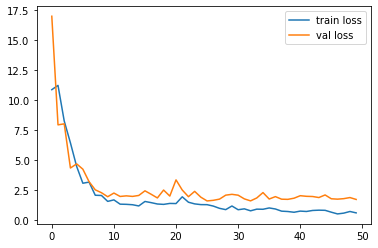

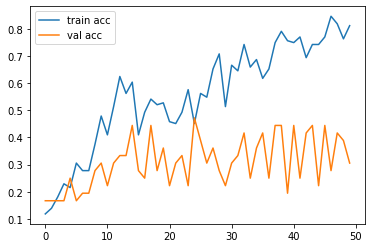

<Figure size 432x288 with 0 Axes>

In [35]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [38]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

C:\Users\archi\Anacondaa\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [39]:
y_pred = model.predict(test_set)


In [40]:
y_pred


array([[1.60905495e-01, 3.32497388e-01, 1.55156538e-01, 1.34172272e-02,
        2.69273311e-01, 6.87500387e-02],
       [1.24787182e-01, 4.63655651e-01, 2.47855652e-02, 1.38044640e-01,
        1.74309835e-01, 7.44172484e-02],
       [3.13566029e-02, 8.17176420e-03, 1.62119814e-03, 1.15262549e-02,
        6.21840537e-01, 3.25483710e-01],
       [2.20874902e-02, 4.76163208e-01, 4.21421938e-02, 2.37502769e-01,
        5.84835373e-02, 1.63620859e-01],
       [1.15929395e-02, 2.95705527e-01, 2.10528895e-02, 6.27313852e-01,
        3.37506533e-02, 1.05840992e-02],
       [1.21005282e-01, 1.77628323e-02, 1.20331775e-02, 2.20549479e-02,
        8.57113749e-02, 7.41432428e-01],
       [1.00777052e-01, 1.71661824e-01, 1.41591907e-01, 2.06808701e-01,
        2.70244360e-01, 1.08916111e-01],
       [1.71003640e-02, 9.85805020e-02, 6.00973740e-02, 7.60994554e-01,
        4.25198600e-02, 2.07074303e-02],
       [3.64017978e-05, 2.26435456e-02, 1.42910508e-02, 9.56434667e-01,
        6.58878032e-03, 

In [41]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [42]:
y_pred


array([1, 1, 4, 1, 3, 5, 4, 3, 3, 2, 4, 5, 3, 3, 4, 4, 0, 3, 3, 3, 3, 4,
       1, 2, 3, 5, 4, 1, 4, 3, 3, 3, 4, 4, 3, 3], dtype=int64)

In [43]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [44]:
model=load_model('model_resnet50.h5')

In [62]:
img=image.load_img('Dataset/Test/lamborghini/26.jpg',target_size=(224,224))


In [63]:
x=image.img_to_array(img)
x

array([[[ 92.,  92.,  92.],
        [ 92.,  92.,  92.],
        [ 92.,  92.,  92.],
        ...,
        [124., 169., 200.],
        [123., 170., 200.],
        [123., 170., 200.]],

       [[ 92.,  92.,  92.],
        [ 92.,  92.,  92.],
        [ 92.,  92.,  92.],
        ...,
        [124., 169., 200.],
        [122., 169., 199.],
        [122., 169., 199.]],

       [[ 93.,  93.,  93.],
        [ 93.,  93.,  93.],
        [ 93.,  93.,  93.],
        ...,
        [123., 168., 199.],
        [122., 169., 199.],
        [122., 169., 199.]],

       ...,

       [[ 92.,  92.,  90.],
        [ 92.,  92.,  90.],
        [ 92.,  92.,  90.],
        ...,
        [  1.,   2.,   7.],
        [  0.,   1.,   6.],
        [  0.,   1.,   6.]],

       [[ 91.,  91.,  89.],
        [ 91.,  91.,  89.],
        [ 91.,  91.,  89.],
        ...,
        [  1.,   2.,   6.],
        [  0.,   1.,   5.],
        [  0.,   1.,   5.]],

       [[ 91.,  91.,  89.],
        [ 91.,  91.,  89.],
        [ 91.,  

In [64]:
x.shape

(224, 224, 3)

In [65]:
x=x/5
x

array([[[18.4, 18.4, 18.4],
        [18.4, 18.4, 18.4],
        [18.4, 18.4, 18.4],
        ...,
        [24.8, 33.8, 40. ],
        [24.6, 34. , 40. ],
        [24.6, 34. , 40. ]],

       [[18.4, 18.4, 18.4],
        [18.4, 18.4, 18.4],
        [18.4, 18.4, 18.4],
        ...,
        [24.8, 33.8, 40. ],
        [24.4, 33.8, 39.8],
        [24.4, 33.8, 39.8]],

       [[18.6, 18.6, 18.6],
        [18.6, 18.6, 18.6],
        [18.6, 18.6, 18.6],
        ...,
        [24.6, 33.6, 39.8],
        [24.4, 33.8, 39.8],
        [24.4, 33.8, 39.8]],

       ...,

       [[18.4, 18.4, 18. ],
        [18.4, 18.4, 18. ],
        [18.4, 18.4, 18. ],
        ...,
        [ 0.2,  0.4,  1.4],
        [ 0. ,  0.2,  1.2],
        [ 0. ,  0.2,  1.2]],

       [[18.2, 18.2, 17.8],
        [18.2, 18.2, 17.8],
        [18.2, 18.2, 17.8],
        ...,
        [ 0.2,  0.4,  1.2],
        [ 0. ,  0.2,  1. ],
        [ 0. ,  0.2,  1. ]],

       [[18.2, 18.2, 17.8],
        [18.2, 18.2, 17.8],
        [18.2, 1

In [66]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [67]:

model.predict(img_data)

array([[1.2090413e-21, 1.2728979e-20, 1.6697555e-28, 1.0000000e+00,
        3.2612303e-18, 2.7951177e-22]], dtype=float32)

In [68]:
a=np.argmax(model.predict(img_data), axis=1)
a

array([3], dtype=int64)